# Linear models with a categorical (factor) explanatory variable

本节需要的包：


In [14]:
require(s20x)


## Using categorical variables as explanatory variables by using indicator variables

使用指标变量将分类变量用作解释变量


In [15]:
library(s20x)
## Importing data into R
Stats20x.df <- read.table("../data/STATS20x.txt", header = T)
## Change Attend from a character variable to a factor variable
Stats20x.df$Attend <- as.factor(Stats20x.df$Attend)
## Examine the data
Stats20x.df$Attend[1:20]


[1] Yes Yes Yes Yes No  Yes Yes No  Yes Yes No  Yes No  No  No  Yes Yes No  Yes
[20] Yes
Levels: No Yes

简要分析数据集，确保有你需要的可能的关系：


    Sample Size     Mean Median  Std Dev Midspread
No           46 42.21739   40.5 16.34206     20.50
Yes         100 57.78000   58.0 17.67757     28.25


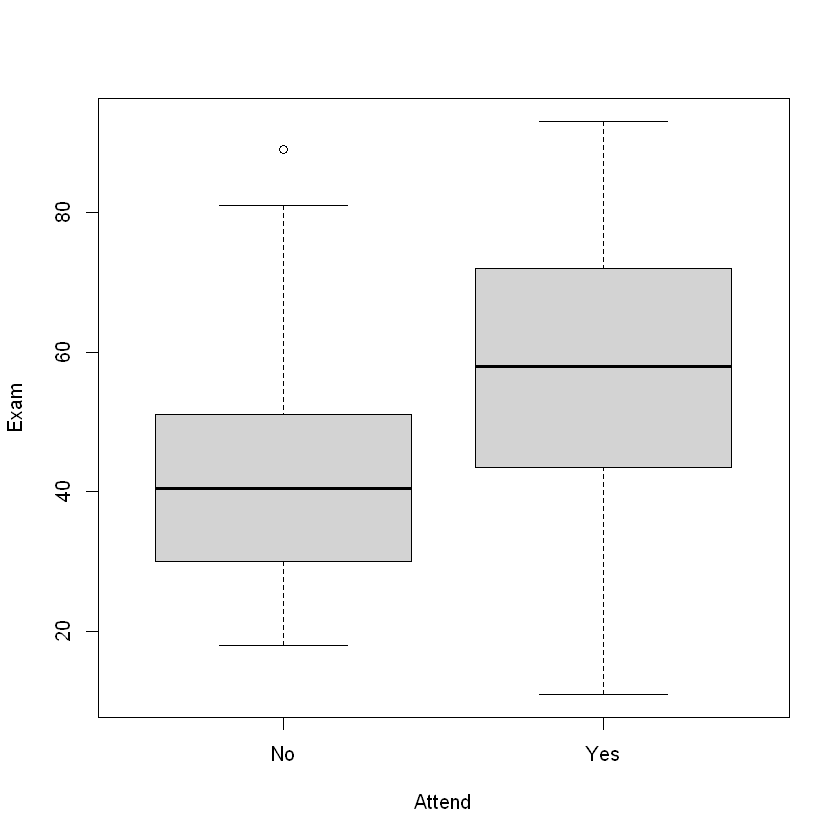

In [16]:
summaryStats(Stats20x.df$Exam, Stats20x.df$Attend)
plot(Exam ~ Attend, data = Stats20x.df)


缺勤的确会让学生成绩变低，在数据分布上的确有一定的关系。

为了在后面进行更好的分析，我们将缺勤的 Yes 和 No 转换为 1 和 0：


In [17]:
# Make a new variable Attend2 which is 1 if Attend = "Yes" and 0 otherwise

# Note how we use two equal signs, ==, to test equality
Stats20x.df$Attend2 <- as.numeric(Stats20x.df$Attend == "Yes")
with(Stats20x.df, table(Attend, Attend2))


      Attend2
Attend   0   1
   No   46   0
   Yes   0 100

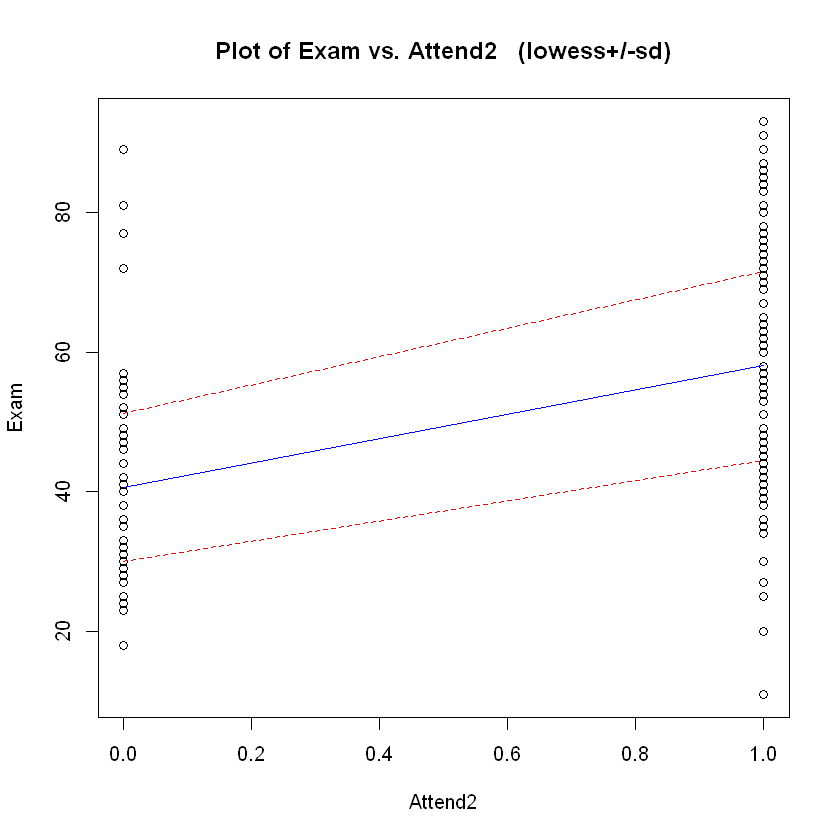

In [18]:
trendscatter(Exam ~ Attend2, data = Stats20x.df)


The linear model for the expected value of is

$$
E[Exam|Attend2] = \beta_0 + \beta_1 Attend2
$$

其中 $\beta_0$ 是截距，即所有缺勤的均值；$\beta_1$ 是考试成绩和缺勤的关系，由缺勤和出勤的成绩关系共同决定。


In [19]:
examattend2.fit <- lm(Exam ~ Attend2, data = Stats20x.df)
summary(examattend2.fit)



Call:
lm(formula = Exam ~ Attend2, data = Stats20x.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.780 -13.108  -0.217  12.642  46.783 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   42.217      2.547  16.578  < 2e-16 ***
Attend2       15.563      3.077   5.058 1.27e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 17.27 on 144 degrees of freedom
Multiple R-squared:  0.1508,	Adjusted R-squared:  0.145 
F-statistic: 25.58 on 1 and 144 DF,  p-value: 1.271e-06


上述拟合代表 x 为 Attend2（0 和 1） 时，y 的期望值，即考试成绩的期望值。

但注意事实上，直接使用 lm() 函数进行拟合，也能得出正确的结果，因为 lm() 函数会自动将分类变量转换为指标变量（AttendYes）：


In [20]:
examattend.fit <- lm(Exam ~ Attend, data = Stats20x.df)
summary(examattend.fit)



Call:
lm(formula = Exam ~ Attend, data = Stats20x.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.780 -13.108  -0.217  12.642  46.783 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   42.217      2.547  16.578  < 2e-16 ***
AttendYes     15.563      3.077   5.058 1.27e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 17.27 on 144 degrees of freedom
Multiple R-squared:  0.1508,	Adjusted R-squared:  0.145 
F-statistic: 25.58 on 1 and 144 DF,  p-value: 1.271e-06


让我们将拟合模型可视化。在这里，我们将使用虚拟变量拟合我们的模型得到的"最佳"估计直线绘制出来。


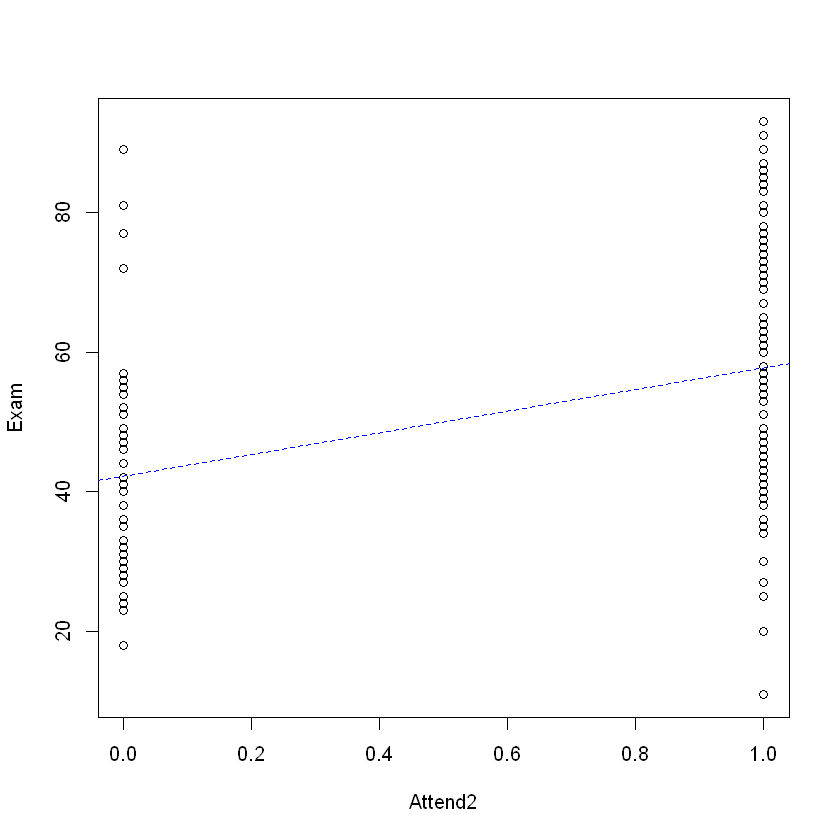

In [21]:
plot(Exam ~ Attend2, data = Stats20x.df)
## Add the lm estimated line to this plot where a=intercept, b=slope
abline(coef(examattend.fit), lty = 2, col = "blue")


模型建立好了，接下来就是我们经典的模型检验三步走了：

1. 残差均值接近于 0
2. 残差满足正态分布
3. 没有或排除了异常点


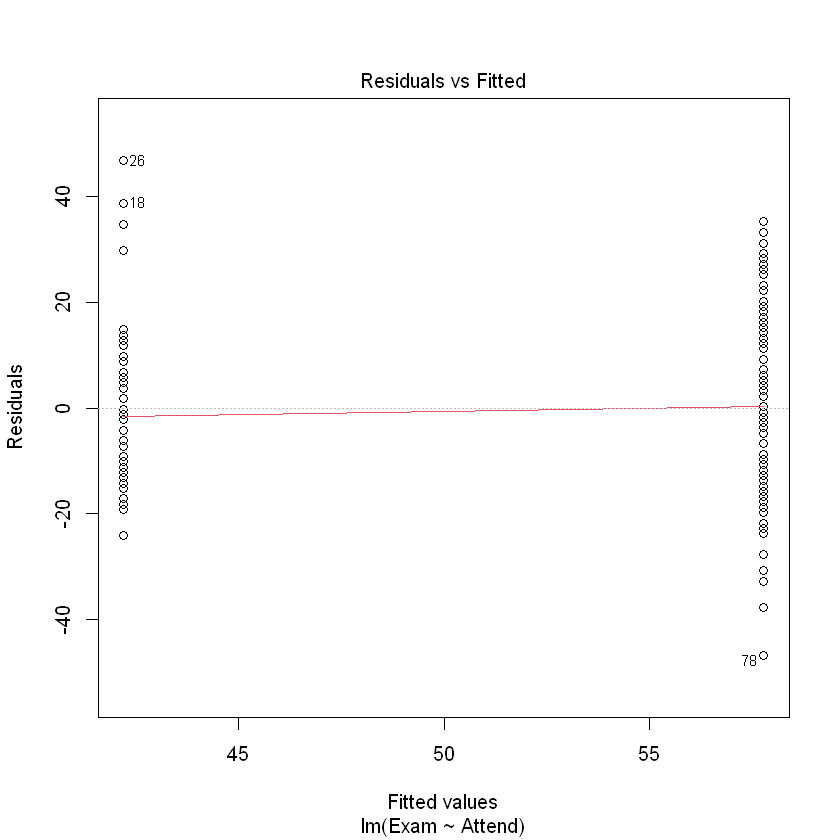

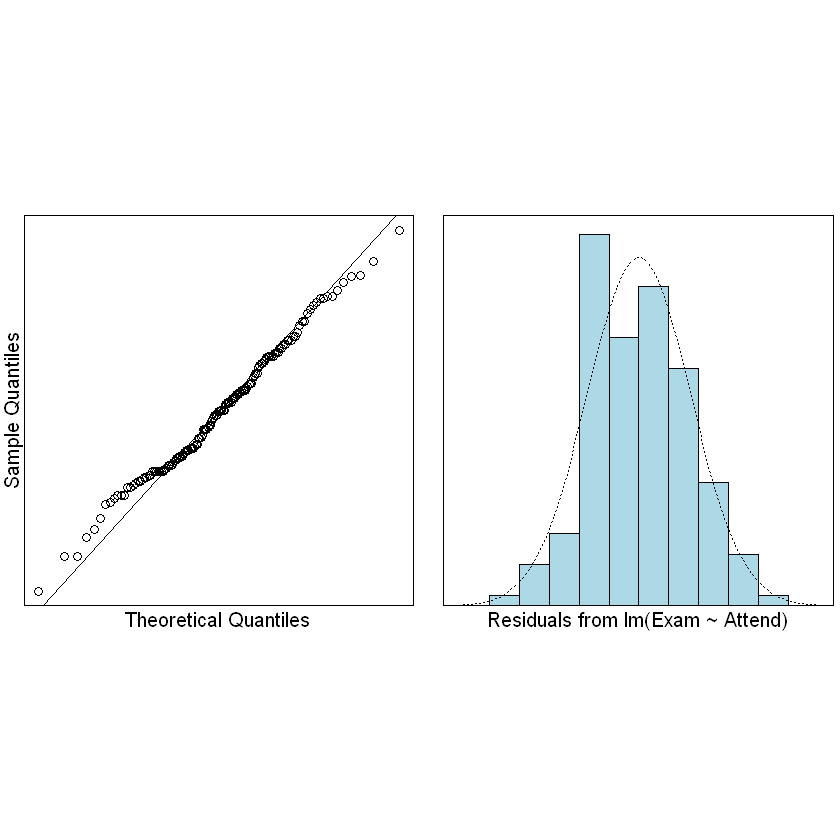

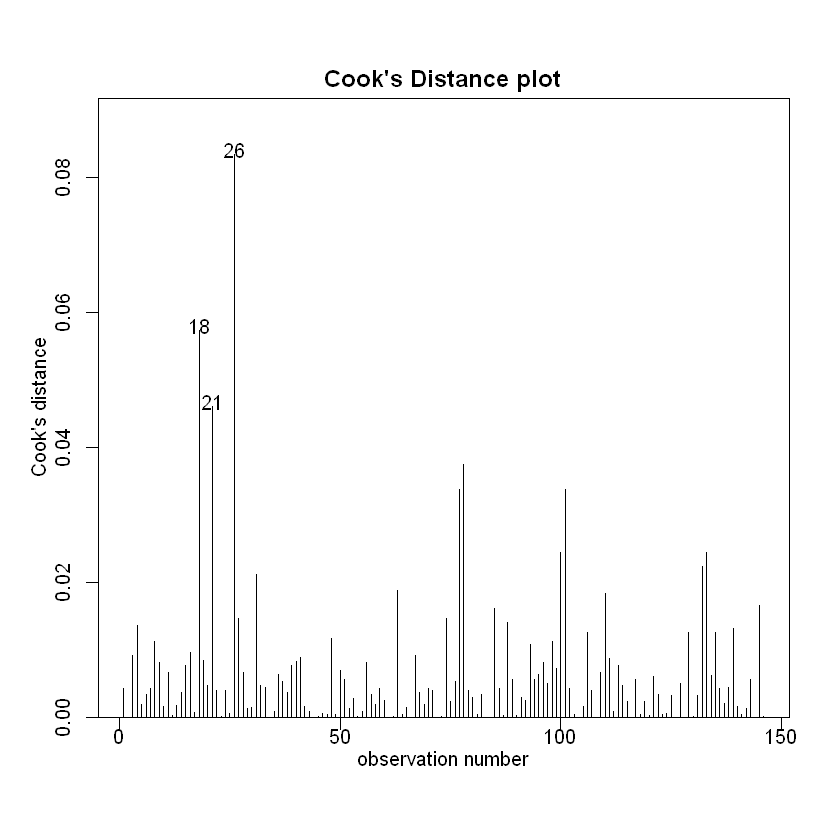

In [22]:
plot(examattend.fit, which = 1)
normcheck(examattend.fit)
cooks20x(examattend.fit)


In [23]:
## Create data frame of values of interest: Attend=="Yes" and "No"
## Make sure that the names of vars are exactly the same as in the data frame
preds.df <- data.frame(Attend = c("No", "Yes"))
predict(examattend.fit, preds.df, interval = "confidence")
predict(examattend.fit, preds.df, interval = "prediction")


,fit,lwr,upr
1,42.21739,37.18401,47.25077
2,57.78000,54.36619,61.19381


,fit,lwr,upr
1,42.21739,7.710259,76.72452
2,57.78000,23.471673,92.08833


再次强调：“confidence”是代表均值预测范围，而“prediction”是代表个体预测范围。
